Working Lon -180
Working Lon -160
Working Lon -140
Working Lon -120
Working Lon -100
Working Lon -80
Working Lon -60
Working Lon -40
Working Lon -20
Working Lon 0
Working Lon 20
Working Lon 40
Working Lon 60
Working Lon 80
Working Lon 100
Working Lon 120
Working Lon 140
Working Lon 160
8.757328033447266  sec


Start
Calcs done in 26.293156147003174  sec
40000


<Figure size 432x288 with 0 Axes>

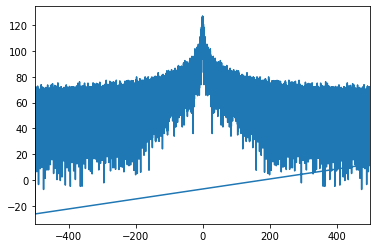

Done


In [133]:
import numpy as np
from datetime import datetime
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py 
import random
import math
import time

from scipy import signal
from matplotlib import pyplot as plt

startSecs = time.time()
R_Earth = 6371 # km
LatMin =  50
LatMax =  90
LonMin = -0.25 #0.4
LonMax =  0.25
sigma_mod =  (LatMax - LatMin)/2.3548
AmpMax = 300
ScaleLat = 1000 # km

 
# 400 - 1200 - 4000
# 300 - 1500 - 4000
# 200 - 1600 - 4000

# Construct random functions of the type:
# f(LAT,LON) = Amplitude * math.e ^ ( - ((LAT+slideLat)^2) / (2*sigmaLat^2)  -  ((LON+slideLon)^2) / (2*sigmaLon^2) )
Deltas = list()
for i in range( 0, 500 ): # 600
    Amplitude = random.random() * 2 *AmpMax - AmpMax # spike height
    sigmaLat  = 0.25 * 57.295 * np.random.normal( 0.5, 0.18 ) *  ScaleLat / (R_Earth * 2.3548) # could be gaussian np.random.normal( 0.5, 0.18 )
    slideLat  = random.random() * 180 - 90   # spike position at Latitudes - they will be contained by LatitudeModulationNorth
    sigmaLon  = 2 * sigmaLat 
    slideLon  = random.random() * (LonMax-LonMin) - (LonMax-LonMin)/2  # spike position at Longitudes
    Deltas.append( [Amplitude, sigmaLat, slideLat, sigmaLon, slideLon] )

for i in range( 0, 500 ): # 3000
    Amplitude = (random.random() * 2 *AmpMax - AmpMax )# spike height
    sigmaLat  = 0.25    * 57.295 * np.random.normal( 0.5, 0.18 ) *  (ScaleLat/10) / (R_Earth * 2.3548) # could be gaussian np.random.normal( 0.5, 0.18 )
    slideLat  = random.random() * 180 - 90   # spike position at Latitudes - they will be contained by LatitudeModulationNorth
    sigmaLon  = 2 * sigmaLat 
    slideLon  = random.random() * (LonMax-LonMin) - (LonMax-LonMin)/2  # spike position at Longitudes
    Deltas.append( [Amplitude, sigmaLat, slideLat, sigmaLon, slideLon] )

for i in range( 0, 500 ): #1000
    Amplitude = (random.random() * 2 *AmpMax - AmpMax) # spike height
    sigmaLat  = 0.25    * 57.295 * np.random.normal( 0.5, 0.18 ) *  (ScaleLat/100) / (R_Earth * 2.3548) # could be gaussian np.random.normal( 0.5, 0.18 )
    slideLat  = random.random() * 180 - 90   # spike position at Latitudes - they will be contained by LatitudeModulationNorth
    sigmaLon  = 2 * sigmaLat 
    slideLon  = random.random() * (LonMax-LonMin) - (LonMax-LonMin)/2  # spike position at Longitudes
    Deltas.append( [Amplitude, sigmaLat, slideLat, sigmaLon, slideLon] )
    
# init
Lons = list( range( -180, 180, 2 ) )
Lats = list( range(  -90,  90, 2 ) )
Zaxis = np.zeros( (len(Lons), len(Lats)) ).tolist()
Data  = np.zeros( (len(Lons), len(Lats)) ).tolist()

# Apply functions at the whole lat-lon grid
for i in range( 0, len(Lons) ):
    if i%10==0: print("Working Lon", Lons[i])
    for j in range( 0, len(Lats) ):
        LON = Lons[i]
        LAT = Lats[j]
        if LAT < LatMin -15: continue # <<<<
        for D in Deltas:
            Amplitude = D[0]
            sigmaLat  = D[1]
            slideLat  = D[2]
            sigmaLon  = D[3]
            slideLon  = D[4]
            LatitudeModulationNorth =  -((LAT-LatMax)**2) / (2*sigma_mod**2) 
            #LatitudeModulationSouth =  -((LAT+LatMax)**2) / (2*sigma_mod**2) 
            
            F1 = ((LAT-slideLat)**2)/(2*sigmaLat**2)
            F2 = (2*sigmaLon**2)
            Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON-slideLon)**2)/F2  + LatitudeModulationNorth )
            #Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON-slideLon)**2)/F2  + LatitudeModulationSouth )
            
            # respect the boundary conditions: spikes at the edge of Longitudes have to be applied to the other edge as well so that the grid becomes a cylinder
            #if LON > 165:
                #Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON-360-slideLon)**2)/F2  + LatitudeModulationNorth )
                #Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON-360-slideLon)**2)/F2  + LatitudeModulationSouth )
            #elif LON < -165:
                #Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON+360-slideLon)**2)/F2  + LatitudeModulationNorth )
                #Data[i][j] += Amplitude * math.e ** ( - F1 - ((LON+360-slideLon)**2)/F2  + LatitudeModulationSouth )

            
finishSecs = time.time()
print( finishSecs-startSecs, " sec")


        
# define the layout of the plot
theLayout = dict( title="Sub Grid Variability", width=1000, height=800,
        scene = dict(
            xaxis = dict(title="Latitude",dtick=10), yaxis = dict(title="Longitude",dtick=20), zaxis = dict( title="" ),
        )
)

surface=go.Surface(x=Lats, y=Lons, z=Data,   colorscale = "jet", surfacecolor = Data,
        colorbar=dict(thickness=20, len=0.75, ticklen=4, title="mV/m"),
)
Plotables = list()
Plotables.append( surface )
fig = dict( data=Plotables, layout=theLayout )
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)

surface=go.Surface(x=Lats, y=Lons, z=Zaxis,   colorscale = "jet", surfacecolor = Data,
        colorbar=dict(thickness=20, len=0.75, ticklen=4, title="mV/m"),
)
Plotables = list()
Plotables.append( surface )
fig = dict( data=Plotables, layout=theLayout )
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)


surface=go.Surface(x=Lats, y=np.full(len(Lons),-180).tolist(), z=Data,   colorscale = "jet", surfacecolor = Data,
        colorbar=dict(thickness=20, len=0.75, ticklen=4, title="mV/m"),
)
surface2=go.Surface(x=np.full(len(Lats),-90).tolist(), y=Lons, z=Data,   colorscale = "jet", surfacecolor = Data,
        colorbar=dict(thickness=20, len=0.75, ticklen=4, title="mV/m"),
)
Plotables = list()
Plotables.append( surface )
Plotables.append( surface2 )
fig = dict( data=Plotables, layout=theLayout )
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)




print("Start")
startSecs = time.time()
SectionData = list()
LON = 0          
myRange = np.arange( 50, 90, 0.001 )
for LAT in myRange:
    #if LAT==50  or LAT==60 or LAT==70 or LAT==80 or LAT==90: print(LAT)
    value = 0
    for D in Deltas:
        Amplitude = D[0]
        sigmaLat  = D[1]
        slideLat  = D[2]
        sigmaLon  = D[3]
        slideLon  = D[4]
        if abs(LAT-slideLat) > 10: continue
        if abs(LON-slideLon) > 10: continue
        LatitudeModulationNorth =  -((LAT-LatMax)**2) / (2*sigma_mod**2) 
        F1 = ((LAT-slideLat)**2)/(2*sigmaLat**2)
        F2 = (2*sigmaLon**2)
        value += Amplitude * math.e ** ( - F1 - ((LON-slideLon)**2)/F2  + LatitudeModulationNorth )
    SectionData.append( value )
finishSecs = time.time()    
print("Calcs done in",  finishSecs-startSecs, " sec")        
print( len(SectionData) )
#            
fig = go.Figure(data=go.Scatter(x=list(myRange), y=SectionData))
fig.update_layout( title="values along Lon=0", xaxis_title="Latitudes", yaxis_title="mV/m" )
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)           


SectionData = np.array(SectionData, dtype=np.float32)
'''
###
freqs, times, spectrogram = signal.spectrogram(SectionData)
plt.figure(figsize=(10, 8))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
###
freqs, psd = signal.welch(SectionData)
plt.figure(figsize=(10, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
'''

import matplotlib.pyplot as plt
from scipy import fftpack
c = 0.001
plt.figure(1)
#plt.plot(myRange, SectionData)
fs=1/c
X = fftpack.fft(SectionData)
freqs = fftpack.fftfreq(len(SectionData)) * fs
plt.figure(2)
plt.plot(freqs,10*np.log(np.abs(X)))
plt.xlim(-fs/2,fs/2)
plt.show()


fig = go.Figure(data=go.Scatter(x=list(freqs), y=list(10*np.log(np.abs(X)))))
fig.update_layout( title="values along Lon=0", xaxis_title="Frequencies", yaxis_title="??" )
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)           



print("Done")
    
    